### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

### Load Dataset

In [3]:
# Loead trained and test data
train_data = np.load('simu_20000_0.1_90_140_train.npy')
test_data = np.load('simu_10000_0.1_141_178_test.npy')

print("The shape of trained data is: ",train_data.shape)
print("The shape of tested data is: ",test_data.shape)  

The shape of trained data is:  (20000, 1006)
The shape of tested data is:  (10000, 1006)


- In the data file, each row includes sensor data (10 seconds * 100Hz) + ID + Time + H + R + S + D 
- H, R, S and D are heartrate, respiratory rate, systolic and diastolic blood pressure

In [11]:
train_data[0]

array([-2.45845714e-07, -2.06162897e-07,  1.56348382e-06, ...,
        1.90000000e+01,  9.10000000e+01,  9.50000000e+01])

- Split dataset into train and test datasets and separating the labels from the features

In [43]:


X_train_data = train_data[:,0:1000]
y_train_data_systolic = train_data[:,-2]
y_train_data_diastolic = train_data[:,-1]

X_test_data = test_data[:,0:1000]
y_test_data_systolic = test_data[:,-2]
y_test_data_diastolic = test_data[:,-1]

# verify the shape of the data
print("The shape of X_train_data is: ",X_train_data.shape)
print("The shape of y_train_data_systolic is: ",y_train_data_systolic.shape)    
print("The shape of y_train_data_diastolic is: ",y_train_data_diastolic.shape)
print("The shape of X_test_data is: ",X_test_data.shape)
print("The shape of y_test_data_systolic is: ",y_test_data_systolic.shape)
print("The shape of y_test_data_diastolic is: ",y_test_data_diastolic.shape)    


The shape of X_train_data is:  (20000, 1000)
The shape of y_train_data_systolic is:  (20000,)
The shape of y_train_data_diastolic is:  (20000,)
The shape of X_test_data is:  (10000, 1000)
The shape of y_test_data_systolic is:  (10000,)
The shape of y_test_data_diastolic is:  (10000,)


In [15]:
print(type(train_data))

<class 'numpy.ndarray'>


Text(0.5, 1.0, 'The data distribution of the training data')

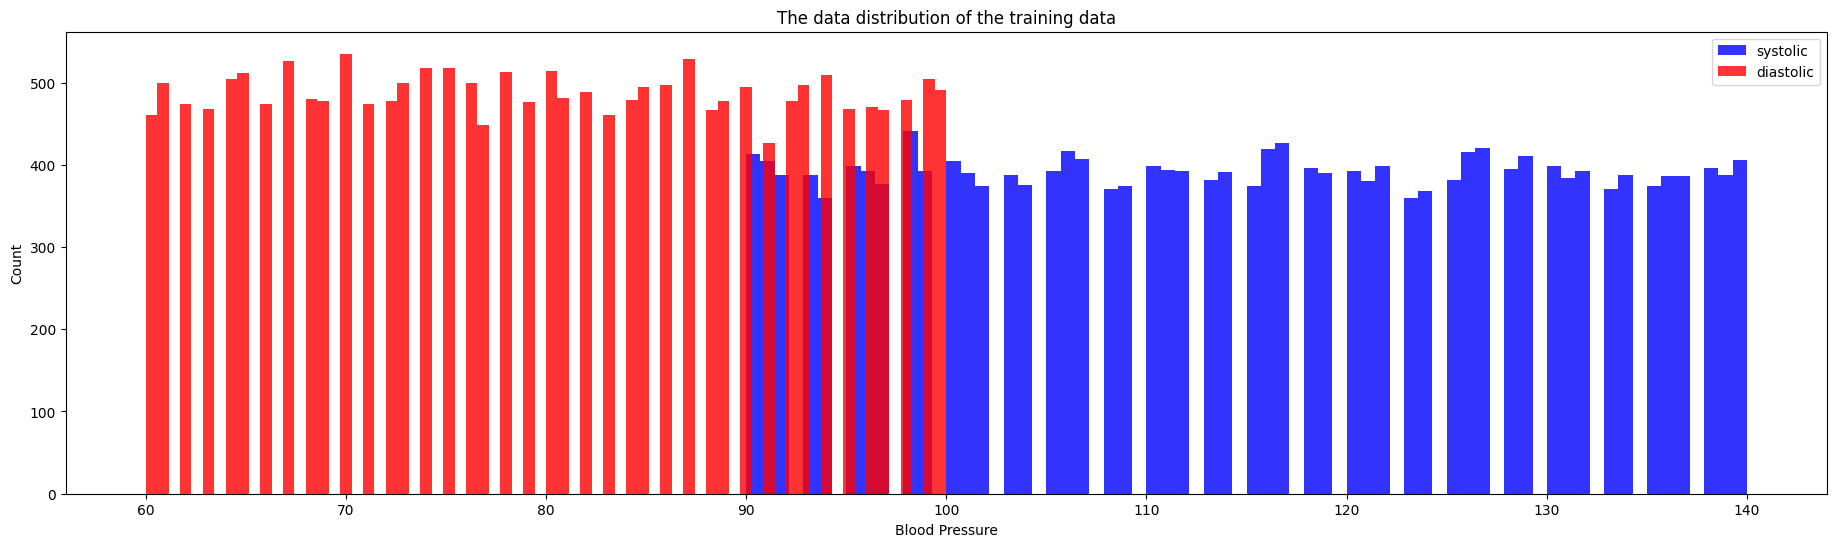

In [59]:
# Analyze the data distribution, normalizaiton and standardization 
# The data distribution of the training data
plt.figure(figsize=(50, 6))
plt.subplot(1,2,1)
plt.hist(y_train_data_systolic, bins=70, color='blue', alpha = 0.8, label='systolic')
plt.hist(y_train_data_diastolic, bins=70, color='red', alpha = 0.8,  label='diastolic')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.legend()
plt.title('The data distribution of the training data')


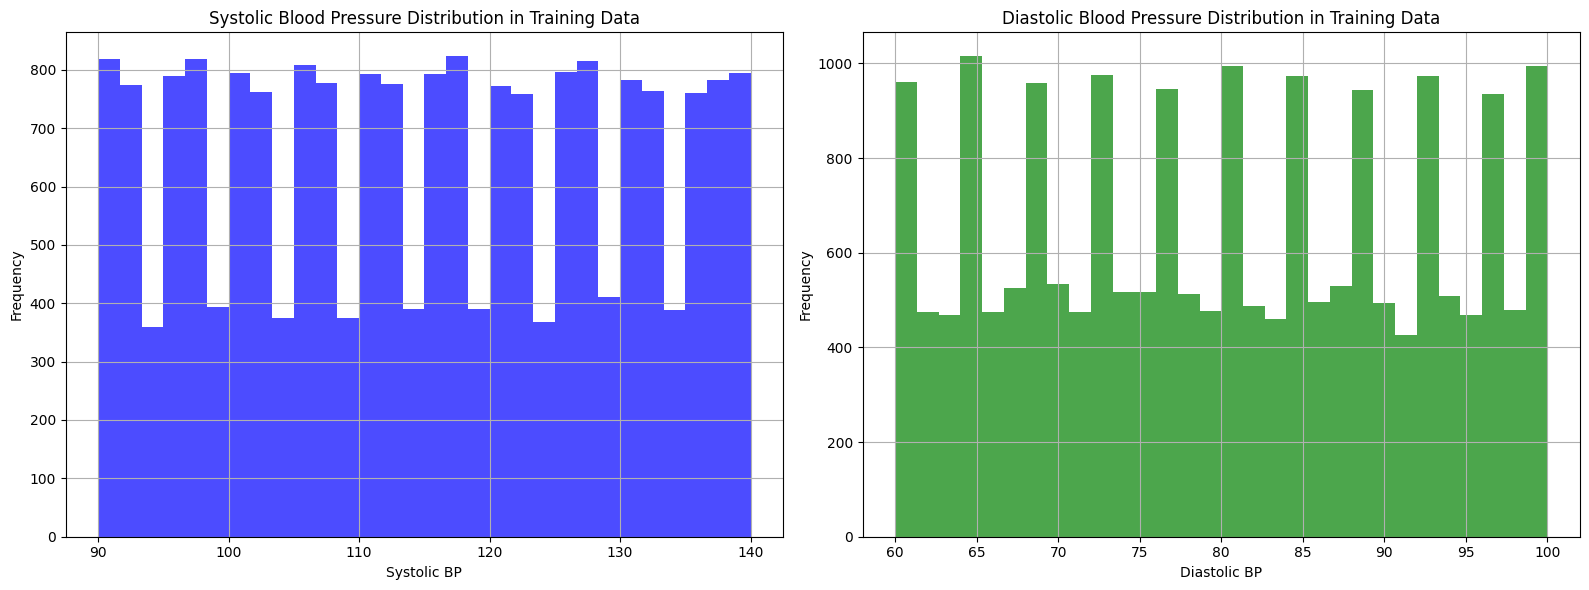

In [61]:
plt.figure(figsize=(16, 6))

# Systolic Blood Pressure Distribution in Training Data
plt.subplot(1, 2, 1)
plt.hist(y_train_data_systolic, bins=30, color='blue', alpha=0.7, label='Systolic BP')
plt.title('Systolic Blood Pressure Distribution in Training Data')
plt.xlabel('Systolic BP')
plt.ylabel('Frequency')
plt.grid(True)

# Diastolic Blood Pressure Distribution in Training Data
plt.subplot(1, 2, 2)
plt.hist(y_train_data_diastolic, bins=30, color='green', alpha=0.7, label='Diastolic BP')
plt.title('Diastolic Blood Pressure Distribution in Training Data')
plt.xlabel('Diastolic BP')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

- Create a pairplot to visualize the relationship between Systolic and Diastolic BP

In [ ]:
# pair plot using sns library
sns.pairplot(pd.DataFrame(X_train_data))
plt.show()


In [70]:
# change it into csv data and add labels of features, 
# first 1000 columns are features, last 2 columns are labels
np.savetxt("train_data.csv", train_data, delimiter=",")

# change it into csv data and add labels of features,
# first 1000 columns are features, last 2 columns are labels
# open the csv file and add the labels of features
# csv pd.read_csv('train_data.csv')
# pd.read_csv('train_data.csv', header=None).to_csv('train_data.csv', header=['f'+str(i) for i in range(1000)]+['systolic','diastolic'], index=False)



In [71]:

train_data = pd.read_csv('train_data.csv')
train_data.head()
print(train_data.shape)

(19999, 1006)


- Use iloc function to select the first 1000 rows of the dataset and last 2 columns in the dataset and save it in a new dataframe

In [74]:
selected_columns = list(range(0, 1000)) + [1004,1005]
training_data = train_data.iloc[:, selected_columns]

# save the training data in new file
training_data.to_csv('training_data.csv', index=False)

- Adding labels and features to the new dataframe

In [90]:
column_names = [f"F{i+1}" for i in range(1000)] + ["Systolic_BP", "Diastolic_BP"]


# Extract features and labels based on column names
feature_columns = [col for col in training_data.columns if "F_" in col]
label_columns = [column_names[1001], "Diastolic_BP"]

# Create a new DataFrame with only the feature and label columns
f_training_data = pd.concat([training_data[feature_columns], training_data[label_columns]], axis=1)
f_training_data.head()


KeyError: "None of [Index(['Diastolic_BP', 'Diastolic_BP'], dtype='object')] are in the [columns]"

In [ ]:
column_names = ["F{i+1}" for i in range(1000)] + ["Systolic_BP", "Diastolic_BP"]
# Extract features and labels based on column names
feature_columns = [col for col in training_data.columns if "F" in col]
label_columns = ["Systolic", "Diastolic"]

# Create a new DataFrame with only the feature and label columns
final_df = pd.concat([training_data[feature_columns], training_data[label_columns]], axis=1)


In [89]:
new_feature_names = [f"f{i+1}" for i in range(1000)]

for i in range(1000):
    final_df = final_df.rename(columns={f"F{i+1}": new_feature_names[i]})
    

f1
f2
f3
f4
f5
f6
f7
f8
f9
f10
f11
f12
f13
f14
f15
f16
f17
f18
f19
f20
f21
f22
f23
f24
f25
f26
f27
f28
f29
f30
f31
f32
f33
f34
f35
f36
f37
f38
f39
f40
f41
f42
f43
f44
f45
f46
f47
f48
f49
f50
f51
f52
f53
f54
f55
f56
f57
f58
f59
f60
f61
f62
f63
f64
f65
f66
f67
f68
f69
f70
f71
f72
f73
f74
f75
f76
f77
f78
f79
f80
f81
f82
f83
f84
f85
f86
f87
f88
f89
f90
f91
f92
f93
f94
f95
f96
f97
f98
f99
f100
f101
f102
f103
f104
f105
f106
f107
f108
f109
f110
f111
f112
f113
f114
f115
f116
f117
f118
f119
f120
f121
f122
f123
f124
f125
f126
f127
f128
f129
f130
f131
f132
f133
f134
f135
f136
f137
f138
f139
f140
f141
f142
f143
f144
f145
f146
f147
f148
f149
f150
f151
f152
f153
f154
f155
f156
f157
f158
f159
f160
f161
f162
f163
f164
f165
f166
f167
f168
f169
f170
f171
f172
f173
f174
f175
f176
f177
f178
f179
f180
f181
f182
f183
f184
f185
f186
f187
f188
f189
f190
f191
f192
f193
f194
f195
f196
f197
f198
f199
f200
f201
f202
f203
f204
f205
f206
f207
f208
f209
f210
f211
f212
f213
f214
f215
f216
f217
f218
f219
f220
f221
f22

In [87]:
column_names = ["F{i+1}" for i in range(1000)] + ["Systolic_BP", "Diastolic_BP"]
# Extract features and labels based on column names
feature_columns = [col for col in training_data.columns if "F" in col]
feature_columns

[]

In [75]:
training_data.head()

,-2.458457138179582314e-07,-2.061628966227813561e-07,1.563483823366793026e-06,5.695118803582858225e-06,-3.201164678413224105e-06,2.597859420543783198e-06,-1.619477303130381509e-06,4.295957207937502546e-07,2.811668138492965922e-07,-7.627104550809248276e-07,...,-2.012992565671966181e-07,-2.175612986897299234e-07,-2.369470211178174729e-07,-2.294532760496779053e-07,-2.023100468262023668e-07,-1.927278584063952293e-07,-2.168651015420372932e-07,-2.393928158602529831e-07,9.100000000000000000e+01,9.500000000000000000e+01
0,2.703969e-07,4.127405e-07,0.000003,0.000007,-0.000001,-3.482201e-09,5.662856e-07,1.321577e-07,9.194240e-08,6.640148e-07,...,1.322118e-07,1.479012e-07,1.587980e-07,1.658027e-07,1.712124e-07,1.769987e-07,1.821953e-07,1.845795e-07,101.0,61.0
1,1.975525e-07,5.929467e-07,0.000005,0.000006,-0.000004,2.734216e-06,-1.420571e-06,1.529121e-06,-5.406525e-07,4.429806e-07,...,4.466840e-07,3.971668e-07,3.478368e-07,3.011470e-07,2.585474e-07,2.226035e-07,1.979552e-07,1.892261e-07,131.0,81.0
2,2.647346e-08,3.576314e-07,0.000005,0.000004,-0.000003,2.490793e-06,-1.057064e-06,2.985681e-07,2.723785e-07,-1.193004e-07,...,1.628922e-07,1.465877e-07,1.263324e-07,1.077481e-07,9.278924e-08,7.921746e-08,6.586452e-08,5.828815e-08,98.0,61.0
3,7.834318e-08,3.751510e-07,0.000003,0.000007,-0.000002,-8.854182e-07,1.466943e-06,-1.357495e-06,1.083601e-06,-5.930964e-07,...,1.093727e-07,1.212996e-07,1.320010e-07,1.413852e-07,1.496382e-07,1.571355e-07,1.629898e-07,1.653973e-07,139.0,93.0
4,-6.450565e-08,6.216832e-08,0.000003,0.000005,-0.000003,2.332594e-06,-5.369354e-07,-2.243157e-07,8.786636e-07,-2.362930e-07,...,-1.981486e-09,-2.374281e-08,-4.781114e-08,-7.117731e-08,-9.144242e-08,-1.080692e-07,-1.206526e-07,-1.265353e-07,116.0,96.0


In [72]:
train_data.describe()

,-2.458457138179582314e-07,-2.061628966227813561e-07,1.563483823366793026e-06,5.695118803582858225e-06,-3.201164678413224105e-06,2.597859420543783198e-06,-1.619477303130381509e-06,4.295957207937502546e-07,2.811668138492965922e-07,-7.627104550809248276e-07,...,-2.023100468262023668e-07,-1.927278584063952293e-07,-2.168651015420372932e-07,-2.393928158602529831e-07,0.000000000000000000e+00,0.000000000000000000e+00.1,1.070000000000000000e+02,1.900000000000000000e+01,9.100000000000000000e+01,9.500000000000000000e+01
count,1.999900e+04,1.999900e+04,1.999900e+04,19999.000000,1.999900e+04,19999.000000,1.999900e+04,1.999900e+04,1.999900e+04,1.999900e+04,...,1.999900e+04,1.999900e+04,1.999900e+04,1.999900e+04,19999.0,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000
mean,5.564189e-09,1.868106e-07,1.978313e-06,0.000004,2.449573e-06,0.000002,1.171902e-06,6.008537e-07,1.681092e-07,-7.525245e-08,...,-2.037811e-09,-2.224505e-09,-3.342119e-09,-4.383887e-09,0.0,10000.000000,99.816641,19.973599,114.961648,79.923796
std,2.603432e-07,3.335606e-07,1.785657e-06,0.000003,3.582972e-06,0.000004,3.406405e-06,2.961602e-06,2.392045e-06,1.883061e-06,...,2.374293e-07,2.488020e-07,2.571098e-07,2.613777e-07,0.0,5773.358353,29.015021,6.068508,14.724264,11.801073
min,-1.793686e-06,-1.568434e-06,-1.018944e-06,-0.000004,-4.993736e-06,-0.000005,-5.495883e-06,-5.214801e-06,-5.735105e-06,-5.263485e-06,...,-1.787229e-06,-1.805288e-06,-1.806422e-06,-1.803319e-06,0.0,1.000000,50.000000,10.000000,90.000000,60.000000
25%,-1.393921e-07,-1.711177e-08,4.751218e-07,0.000002,-3.989461e-07,-0.000002,-1.458872e-06,-1.393747e-06,-1.222764e-06,-9.742944e-07,...,-1.344537e-07,-1.403414e-07,-1.453401e-07,-1.505784e-07,0.0,5000.500000,75.000000,15.000000,102.000000,70.000000
50%,5.973126e-09,1.468985e-07,1.428733e-06,0.000004,2.747136e-06,0.000002,7.022766e-07,2.074666e-07,1.920694e-08,-1.991675e-08,...,-1.296777e-09,-7.176254e-10,-1.734536e-09,-1.909842e-09,0.0,10000.000000,100.000000,20.000000,115.000000,80.000000
75%,1.510935e-07,3.569513e-07,3.199987e-06,0.000006,5.643028e-06,0.000005,3.115279e-06,2.032655e-06,1.287288e-06,8.164242e-07,...,1.314238e-07,1.358976e-07,1.398005e-07,1.414518e-07,0.0,14999.500000,125.000000,25.000000,128.000000,90.000000
max,1.619504e-06,2.498476e-06,8.185603e-06,0.000009,9.514414e-06,0.000009,9.332580e-06,9.310749e-06,9.246607e-06,9.387921e-06,...,1.386629e-06,1.424915e-06,1.445962e-06,1.451926e-06,0.0,19999.000000,150.000000,30.000000,140.000000,100.000000


In [73]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Columns: 1006 entries, -2.458457138179582314e-07 to 9.500000000000000000e+01
dtypes: float64(1006)
memory usage: 153.5 MB


In [52]:
# Check bar plot
# y_train_data_systolic_bar = np.unique(y_train_data_systolic, return_counts=True)
# y_train_data_diastolic_bar = np.unique(y_train_data_diastolic, return_counts=True)

y_train_data_systolic.value_counts().plot.bar()



AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [49]:
sns.countplot(x=y_train_data_systolic, data=y_test_data_diastolic, palette="Greens_d")

AttributeError: 'numpy.ndarray' object has no attribute 'get'

In [31]:
my_array = np.array([[1, 2, 3, 4, 5], [6,7,8,9,10]])
my_array1 = np.arange(1, 6)
my_array2 = np.arange(6)

In [25]:
print(my_array)
print(my_array1)
print(my_array2)
print(type(my_array1))

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
[1 2 3 4 5]
[0 1 2 3 4 5]
<class 'numpy.ndarray'>


In [28]:
print(my_array.shape)

(2, 5)


In [33]:
my_array.reshape((5,2))
print(my_array)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


In [29]:
from_list = np.array([[1, 2, 3], [4, 5, 6]], dtype=np.int8)
array_2d = np.array((np.arange(0,8,2), np.arange(1,8,2)))

print(array_2d)

[[0 2 4 6]
 [1 3 5 7]]


In [32]:
print("2D shape: ", array_2d.shape)
print("1D shape: ", my_array.shape)

2D shape:  (2, 4)
1D shape:  (2, 5)


In [36]:
array_2d = array_2d.reshape((4,2))
print(array_2d)

[[0 2]
 [4 6]
 [1 3]
 [5 7]]


In [42]:
array_2d[:, -1]

array([2, 6, 3, 7])